In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 通过随机森林的方式对酒店文本评价进行文本情感分类。
# （要求：输出数据分布的饼图，
# 划分30%的测试集，
# 随机状态设置为自己的学号，
# 输出混淆矩阵、准确率、f1度量值。）

In [3]:
# 读取数据
df = pd.read_csv('酒店文本评价.csv', encoding='utf-8')
df.head()

,label,review
0,1,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较..."
1,1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!
2,1,早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。
3,1,宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小...
4,1,"CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风"


<AxesSubplot:ylabel='label'>

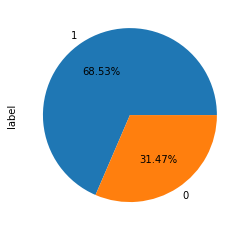

In [4]:
# 绘制数据分布的饼图，根据label的值，将数据分为正面评价和负面评价
# 1为正面评价，0为负面评价
df['label'].value_counts().plot(kind='pie', autopct='%.2f%%')


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
# 导入中文的停用词
stopWords=pd.read_csv('stopwords.txt',encoding='utf-8')
stopWordsList=[]
for i in range(len(stopWords)):
    stopWordsList.append(stopWords.iloc[i,0])

In [7]:
# 将文本转换成vector数字
vectorizer = TfidfVectorizer(max_features=100,min_df=5,max_df=0.8,stop_words=stopWordsList)
x=df['review']
x=vectorizer.fit_transform(x.values.astype('U')).toarray()

In [8]:
x.shape

(7766, 100)

In [9]:
# 划分30%的测试集，随机状态设置为自己的学号
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, df['label'], test_size=0.3, random_state=7055)

In [10]:
# 确定随机森林中树的数量和随机状态
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=250, random_state=0)
clf

RandomForestClassifier(n_estimators=250, random_state=0)

In [11]:
# 训练模型
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=0)

In [12]:
# 对测试集进行预测
y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
# 输出混淆矩阵
print(confusion_matrix(y_test,y_pred))

[[  77  678]
 [  32 1543]]


In [15]:
# 输出准确率
print(accuracy_score(y_test, y_pred))

0.6952789699570815


In [16]:
# 输出f1度量值
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.10      0.18       755
           1       0.69      0.98      0.81      1575

    accuracy                           0.70      2330
   macro avg       0.70      0.54      0.50      2330
weighted avg       0.70      0.70      0.61      2330

